In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

In [11]:
dataset = pd.read_csv("creditcard.csv")

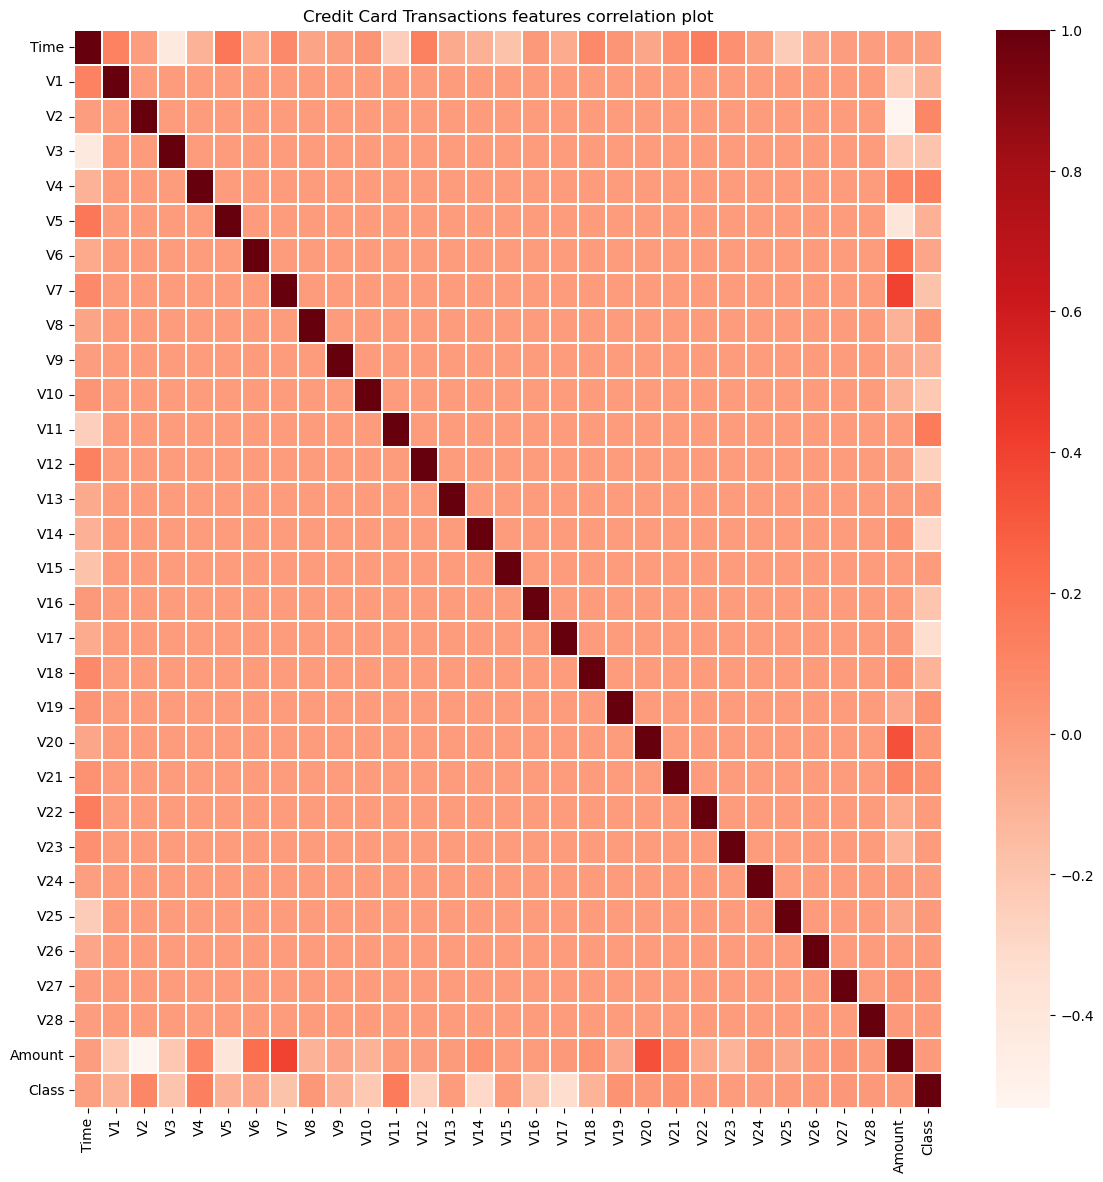

In [12]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = dataset.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 0.1, cmap="Reds")
plt.show()

In [20]:
#3600 seconds = 1 hour
dataset['Hour'] = dataset['Time'].apply(lambda x: np.floor(x / 3600))

legit = dataset.loc[dataset['Class'] == 0]["Hour"]
fraud = dataset.loc[dataset['Class'] == 1]["Hour"]

hist_data = [legit, fraud]
group_labels = ['Legit', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, colors=["black", "red"])
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time (in hours)'))
iplot(fig, filename='dist_only')

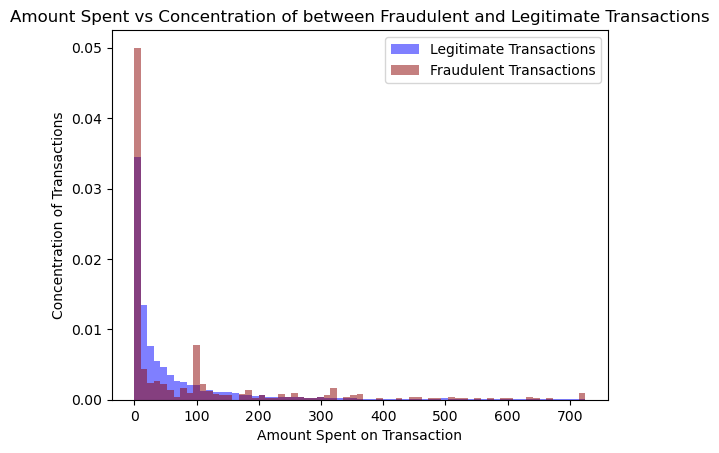

In [14]:
bins = np.linspace(0, 725, 70)

plt.hist(dataset[dataset["Class"] == 0]["Amount"], bins=bins, alpha=0.5, density=True, label="Legitimate Transactions", color="Blue")
plt.hist(dataset[dataset["Class"] == 1]["Amount"], bins=bins, alpha=0.5, density=True, label="Fraudulent Transactions", color="DarkRed")

plt.xlabel("Amount Spent on Transaction")
plt.ylabel("Concentration of Transactions")

plt.title("Amount Spent vs Concentration of between Fraudulent and Legitimate Transactions")

plt.legend(loc="upper right")

plt.show()